In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
keras.__version__

'2.5.0'

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [1]:
X_train_full.shape

NameError: ignored

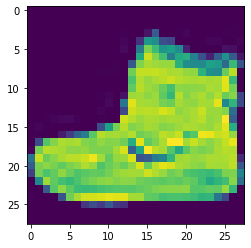

In [ ]:
plt.imshow(X_train_full[0])

In [ ]:
y_train_full[0]

9

In [ ]:
class_names=["T-Shirt","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [ ]:
class_names[y_train_full[0]]

'Ankle Boot'

In [ ]:
X_train_full[0].shape

(28, 28)

In [ ]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

In [ ]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
X_valid,X_train = X_train_n[:5000],X_train_n[5000:]
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test_n

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train_full.shape


(60000, 28, 28)

In [ ]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import pydot

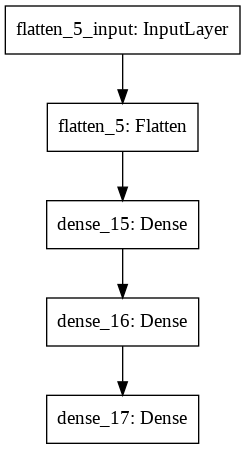

In [ ]:
keras.utils.plot_model(model)

In [ ]:
model.layers

In [ ]:
model.layers[1]

In [ ]:
weights,biases = model.layers[1].get_weights()

In [ ]:
weights

array([[-0.04026214, -0.00488027,  0.04105907, ...,  0.01222061,
        -0.01647738, -0.05633223],
       [-0.04408527, -0.06542546,  0.02613662, ...,  0.00695812,
        -0.03313734, -0.06680755],
       [-0.0236677 , -0.07038021,  0.07310889, ...,  0.03176861,
         0.06685256, -0.00539924],
       ...,
       [-0.05580046,  0.06468715,  0.03529488, ..., -0.05562342,
         0.04508107, -0.00798171],
       [ 0.04824449,  0.03829277, -0.02295991, ...,  0.04406049,
        -0.02413855, -0.06730425],
       [ 0.0217209 , -0.07032192,  0.01697165, ...,  0.01682312,
        -0.065232  ,  0.03923978]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

In [ ]:
model

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [ ]:
model_history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2254 - accuracy: 0.9181 - val_loss: 0.2969 - val_accuracy: 0.8904
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2207 - accuracy: 0.9212 - val_loss: 0.2903 - val_accuracy: 0.8968
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2184 - accuracy: 0.9220 - val_loss: 0.3048 - val_accuracy: 0.8884
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2147 - accuracy: 0.9232 - val_loss: 0.2864 - val_accuracy: 0.8924
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2118 - accuracy: 0.9241 - val_loss: 0.2948 - val_accuracy: 0.8908
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2082 - accuracy: 0.9255 - val_loss: 0.3095 - val_accuracy: 0.8890
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2039 - accuracy: 0.9267 - val_loss: 0.2849 - val_accuracy:

In [ ]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
model_history.history

{'accuracy': [0.918109118938446,
  0.9211817979812622,
  0.921999990940094,
  0.9232363700866699,
  0.9240545630455017,
  0.9255272746086121,
  0.9267091155052185,
  0.9276000261306763,
  0.9287636280059814,
  0.9302726984024048,
  0.931636393070221,
  0.9321818351745605,
  0.934036374092102,
  0.9352909326553345,
  0.9356181621551514,
  0.9364908933639526,
  0.9369454383850098,
  0.9394545555114746,
  0.9387090802192688,
  0.9414181709289551,
  0.9407636523246765,
  0.9429818391799927,
  0.9434000253677368,
  0.944599986076355,
  0.9452000260353088,
  0.9463454484939575,
  0.9472908973693848,
  0.9473272562026978,
  0.9490363597869873,
  0.9500545263290405],
 'loss': [0.2253570556640625,
  0.22066015005111694,
  0.21835002303123474,
  0.21470379829406738,
  0.21176555752754211,
  0.20819813013076782,
  0.20388464629650116,
  0.20154336094856262,
  0.19854576885700226,
  0.19492998719215393,
  0.19137315452098846,
  0.18959714472293854,
  0.18645986914634705,
  0.18340325355529785,
  0

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3272 - accuracy: 0.8927


[0.32724958658218384, 0.8927000164985657]

In [ ]:
X_new = X_test[:6]

In [ ]:
X_new.shape

(6, 28, 28)

In [ ]:
X_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

In [ ]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.13, 0.  , 0.  , 0.  , 0.  , 0.  , 0.87, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1, 1, 6, 1])

In [ ]:
X_new[0].shape

(28, 28)

In [ ]:
X_new[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
res = []
sa = np.array(list(X_new[2]))
res.append(sa)
np.array(res).shape

(1, 28, 28)

In [ ]:
np.array(res)

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.00392157, 0.        ,
         0.2627451 , 0.69411765, 0.50588235, 0.6       , 0.45882353,
         0.50588235, 0.57254902, 0.55294118, 0.68627451, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.00784314, 0.        ,
         0.76862745, 1.        , 1.        , 1.        , 0.94509804,
         0.98431373, 1.        , 0.96078431, 1.        , 0.29803922,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.95294118, 0.92941176, 0.85098039, 0.89411765, 0.90588235,
         0.

In [ ]:
X_new.shape

(3, 28, 28)

In [ ]:
np.array(res).shape

(1, 28, 28)

In [ ]:
y_proba = model.predict(np.array(res))
y_proba.round(2)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = model.predict_classes(np.array(res))
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1])

In [ ]:
np.array(class_names)[y_pred]

array(['Trousers'], dtype='<U10')

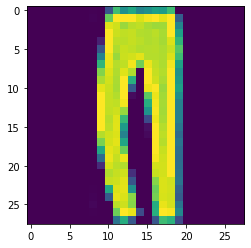

In [ ]:
plt.imshow(X_new[2])

In [ ]:
X_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
X_new.shape

(3, 28, 28)

In [ ]:
class_names

['T-Shirt',
 'Trousers',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [ ]:
import cv2 as cv

In [ ]:
sampleimg = cv.imread("/content/drive/MyDrive/Colab Notebooks/Deep Learning Internshala/boot.jpg")

In [ ]:
sampleimg.shape

(28, 28, 3)

In [ ]:
gray = cv.cvtColor(sampleimg, cv.COLOR_BGR2GRAY)
gray


array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 254, 254, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 254, 254, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 255, 255, 255,
        255, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [25

In [ ]:
gray = gray/255
gray

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.99607843, 0.99607843, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.    

In [ ]:
resimg = []
saimg = np.array(gray)
resimg.append(saimg)
np.array(resimg).shape

(1, 28, 28)

In [ ]:
y_proba = model.predict(np.array(resimg))
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
y_pred = model.predict_classes(np.array(resimg))
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([8])

In [ ]:
np.array(class_names)[y_pred]

array(['Bag'], dtype='<U10')

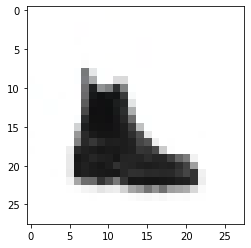

In [ ]:
plt.imshow(sampleimg)